# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, normalize
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from scipy.stats import boxcox, probplot, norm, shapiro
from time import time
from pandas.plotting import scatter_matrix

import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('bank-additional-full.csv',delimiter=';')

In [4]:
df

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...         1    999         0   
1      telephone   may         mon  ...         1    999         0   
2      telephone   may         mon  ...         1    999         0   
3      telephone   may         mon  ...         1    999         0   
4      telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41183   cellular   nov         fri  ...         1    999         0   
41184   cellular   nov         fri  ...         1    999         0   
41185   cellular   nov         fri  ...         2    999         0   
41186   cellular   nov         fri  ...         1    999         0   
41187   cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[41188 rows x 21 columns]

# The number of Subscribes users - Binary Yes/No, Checking balanced Dataset


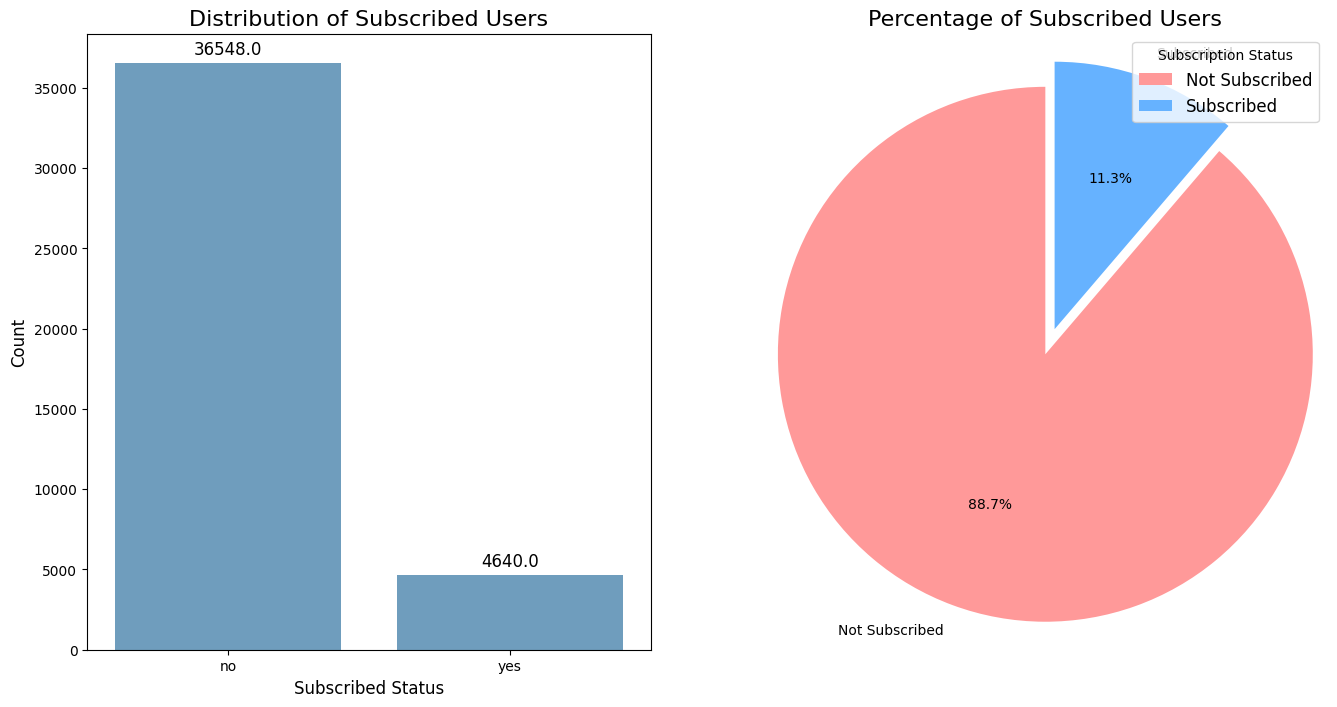

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the overall figure size
plt.figure(figsize=(16, 8))

# Subplot 1: Checking balance of Dataset
plt.subplot(121)
plt.title('Distribution of Subscribed Users', fontsize=16)
sns.set_palette("pastel")  # Set a pastel color palette
countplot = sns.countplot(x="y", data=df, alpha=0.7)  # Save the countplot object
plt.xlabel('Subscribed Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Annotate each bar with its count
for p in countplot.patches:
    plt.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points', fontsize=12)

# Subplot 2: Subscribed Status In Percentage
plt.subplot(122)
plt.title('Percentage of Subscribed Users', fontsize=16)
mush_classpie = df['y'].value_counts()
mush_size = mush_classpie.values.tolist()
mush_labels = ['Not Subscribed', 'Subscribed']
colors = ['#FF9999', '#66B2FF']
explode = (0, 0.1)  # Explode the "Subscribed" slice for emphasis
plt.pie(mush_size, labels=mush_labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add a legend
plt.legend(title="Subscription Status", loc="upper right", fontsize=12)

plt.show()

# Analyzing Job-wise Count of People with Bar Split Education Levels


Text(0.5, 0, '---Job---')

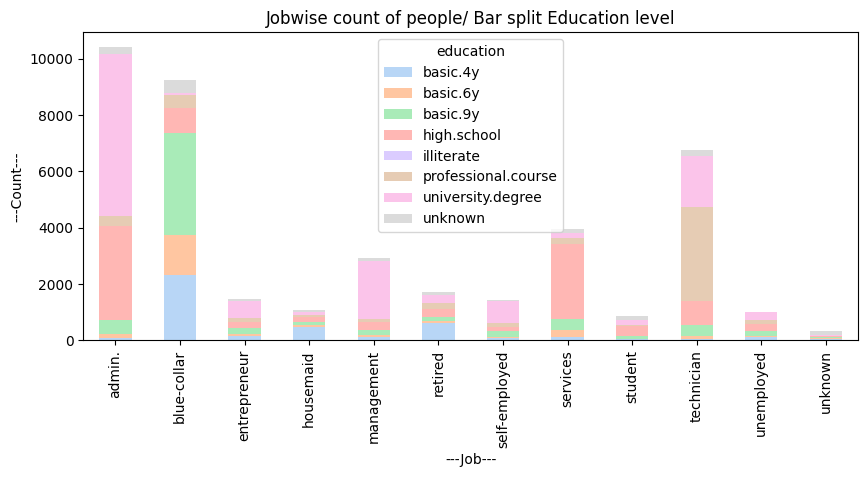

In [12]:
#pivot table to get jobs as index and education as column. count of 'age' are the values
df_pivot = pd.pivot_table(df,columns='education', index='job', aggfunc='count',values='age')
df_pivot.plot(kind='bar',stacked=True, figsize=(10,4), alpha=0.75)
plt.title('Jobwise count of people/ Bar split Education level')
plt.ylabel('---Count---')
plt.xlabel('---Job---')


# How Different Factors Affect Subscription Response: Exploring Contact, Loan, Default, and Housing Impact with Dual Pie Charts

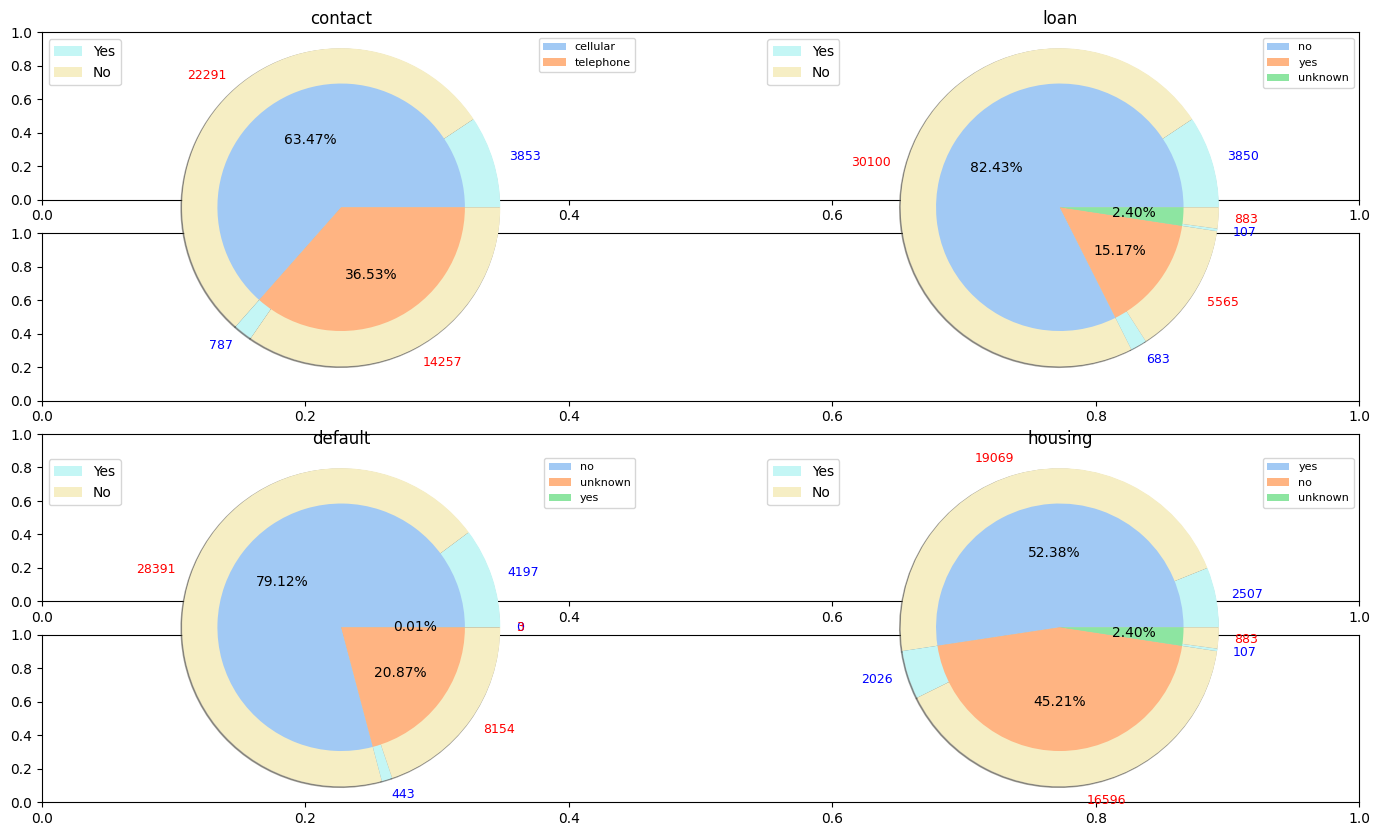

In [6]:
f, axes = plt.subplots(4,1, figsize=(17,10), sharey = True) 
num_col = ['contact', 'loan', 'default', 'housing']

for j,col in enumerate(num_col):
    cols = df[col].value_counts()
    pop_size = cols.values.tolist()
    pop_types = cols.axes[0].tolist()
    poisonous_pop = [] 
    edible_pop = []   
    for pop in pop_types: 
        size = len(df[df[col] == pop].index)
        edibles = len(df[(df[col] == pop) & (df['y'] == 'yes')].index)
        edible_pop.append(edibles)
        poisonous_pop.append(size-edibles)
    combine_ed_poi = []
    for i in range(0,len(edible_pop)):
        combine_ed_poi.append(edible_pop[i])
        combine_ed_poi.append(poisonous_pop[i])

    #Double pie chart.
    plt.subplot(2,2,j+1)
    plt.title(col)
    #Outer Pie Chart
    patches1, texts1 = plt.pie(combine_ed_poi,radius = 4.5,labels= combine_ed_poi,
                                    colors=['#C4F6F5','#F6EEC4'], shadow=True, labeldistance= 1.1)
    for i in range(0,len(texts1)):
        if(i%2==0):
            texts1[i].set_color('blue')
        else:
            texts1[i].set_color('red')
    for aut in texts1:
        aut.set_fontsize(9)
    #Inner Pie Chart
    patches2, texts2, autotexts2 = plt.pie(pop_size, radius = 3.5,
            autopct='%1.2f%%', shadow=True, labeldistance= 4.2)
    for aut in autotexts2:
        aut.set_fontsize(10)
        aut.set_horizontalalignment('center')
    #Set 2 Legends to the plot.
    first_legend   = plt.legend(patches1, ['Yes','No'], loc="upper left", fontsize=10)
    second_ledgend = plt.legend(patches2, pop_types, loc="best",fontsize=8)
    plt.gca().add_artist(first_legend)
    plt.axis('equal')
plt.show()

# Analyzing Monthly Subscription Response: A Pie Chart Breakdown by Absolute Values

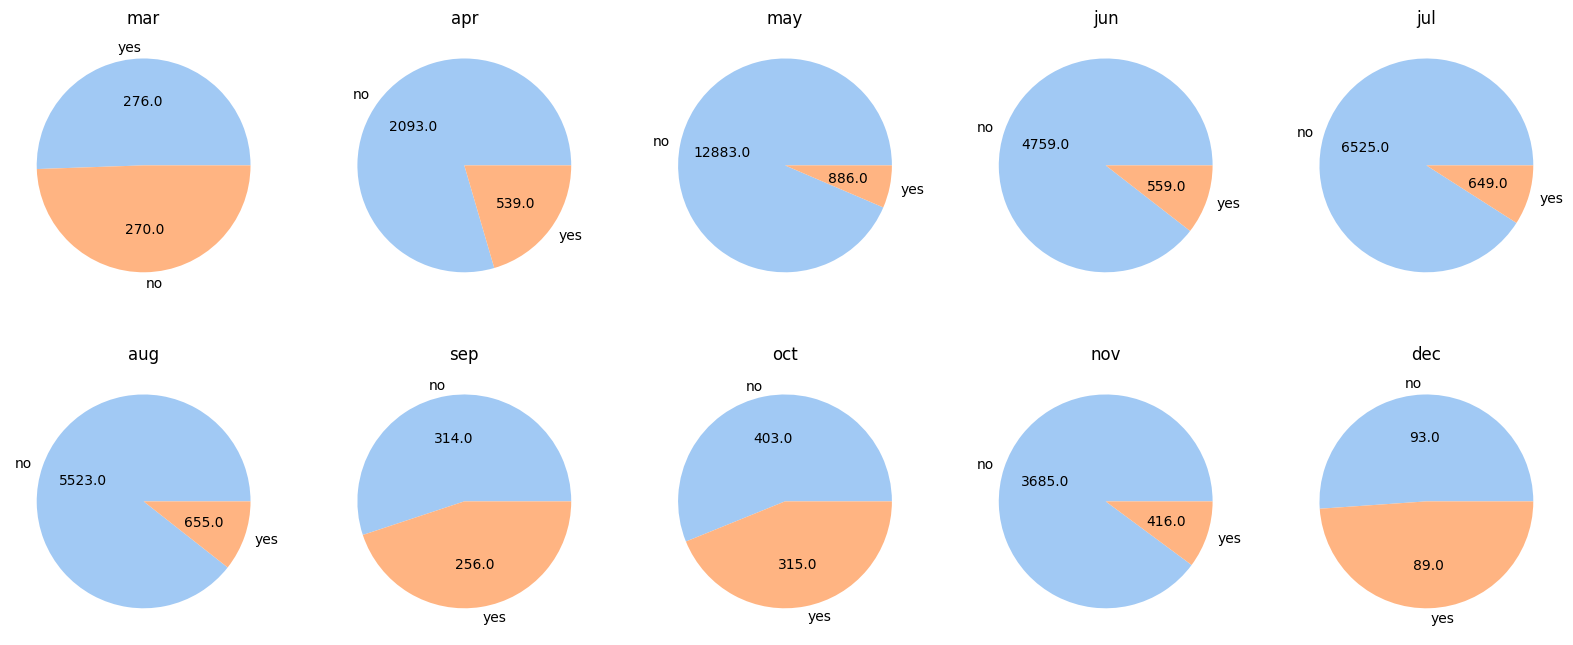

In [7]:
def absolute_value(val,month):
    a = round(val*sum(df[df['month']==month].y.value_counts())/100,0)
    return a




fig, axs = plt.subplots(2,5,figsize=(20,8))
plot_dict=dict(zip(range(0,10),[axs[0,0],axs[0,1],axs[0,2],axs[0,3],axs[0,4],
                     axs[1,0],axs[1,1], axs[1,2], axs[1,3], axs[1,4]]))

#enumerate returns tuple of month and a number(idx)
for idx, month in enumerate(['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']):
    #gets axes from dict and plots on it
    plot_dict.get(idx).pie(df[df['month']==month].y.value_counts(),
             labels=df[df['month']==month].y.value_counts().index, autopct=lambda val: absolute_value(val,month))
    plot_dict.get(idx).set_title(month)

# Numeric Columns Correlation Heatmap

nr.employed      -0.354678
pdays            -0.324914
euribor3m        -0.307771
emp.var.rate     -0.298334
cons.price.idx   -0.136211
campaign         -0.066357
age               0.030399
cons.conf.idx     0.054878
previous          0.230181
duration          0.405274
y                 1.000000
Name: y, dtype: float64


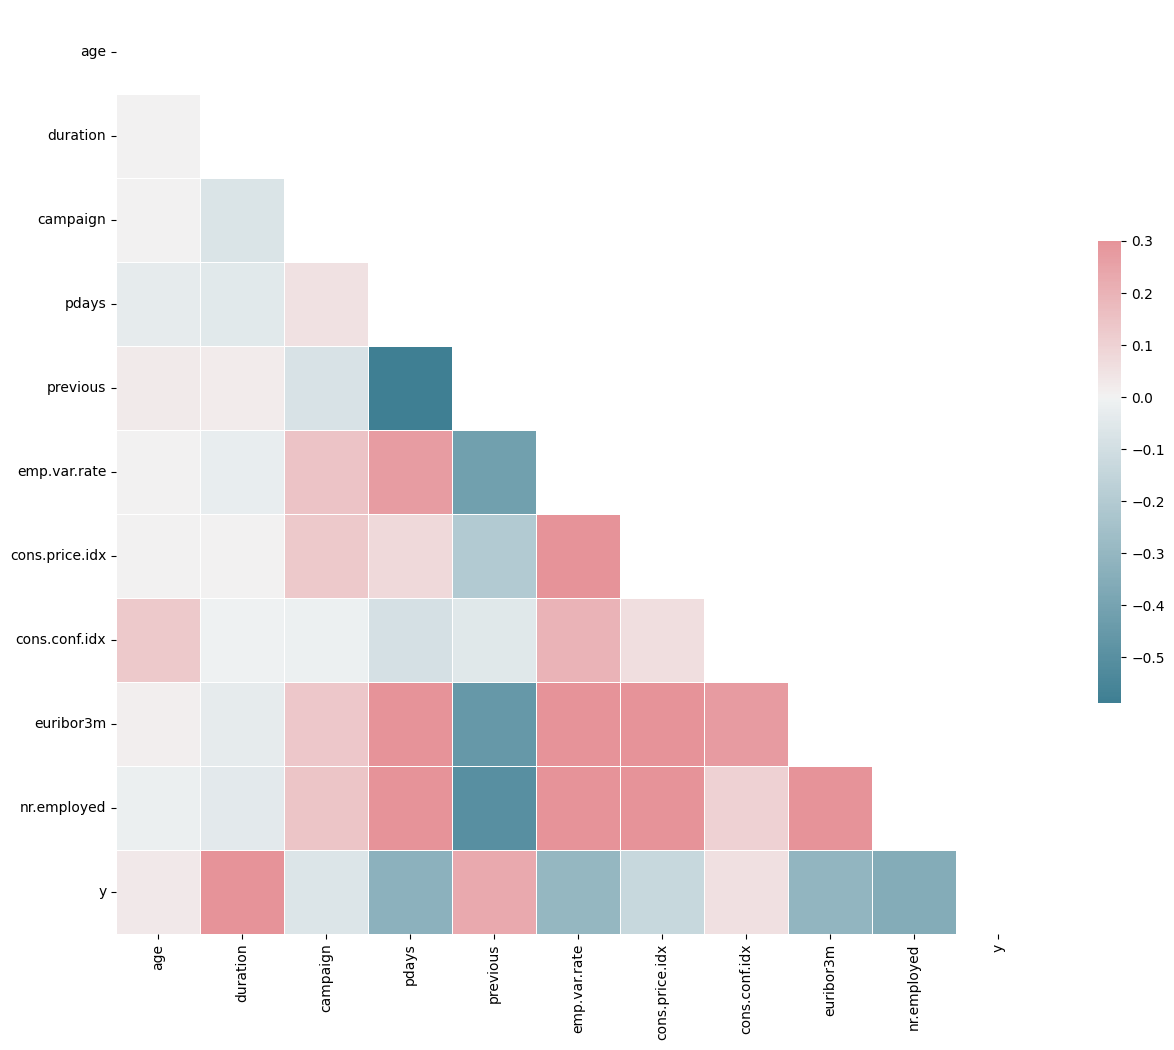

In [8]:
numeric_columns = df.select_dtypes(include=['number'])
numeric_columns['y']=df['y'].replace({'yes':1, 'no':0})


# Assuming you have numeric_columns defined
corr = numeric_columns.corr()
print(corr['y'].sort_values(axis=0, ascending=True))

# Use bool directly instead of np.bool
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(15, 12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

# Exploring Age Distribution: Count of People in Each Age Group

Text(0.5, 1.0, 'Number of people in each age group')

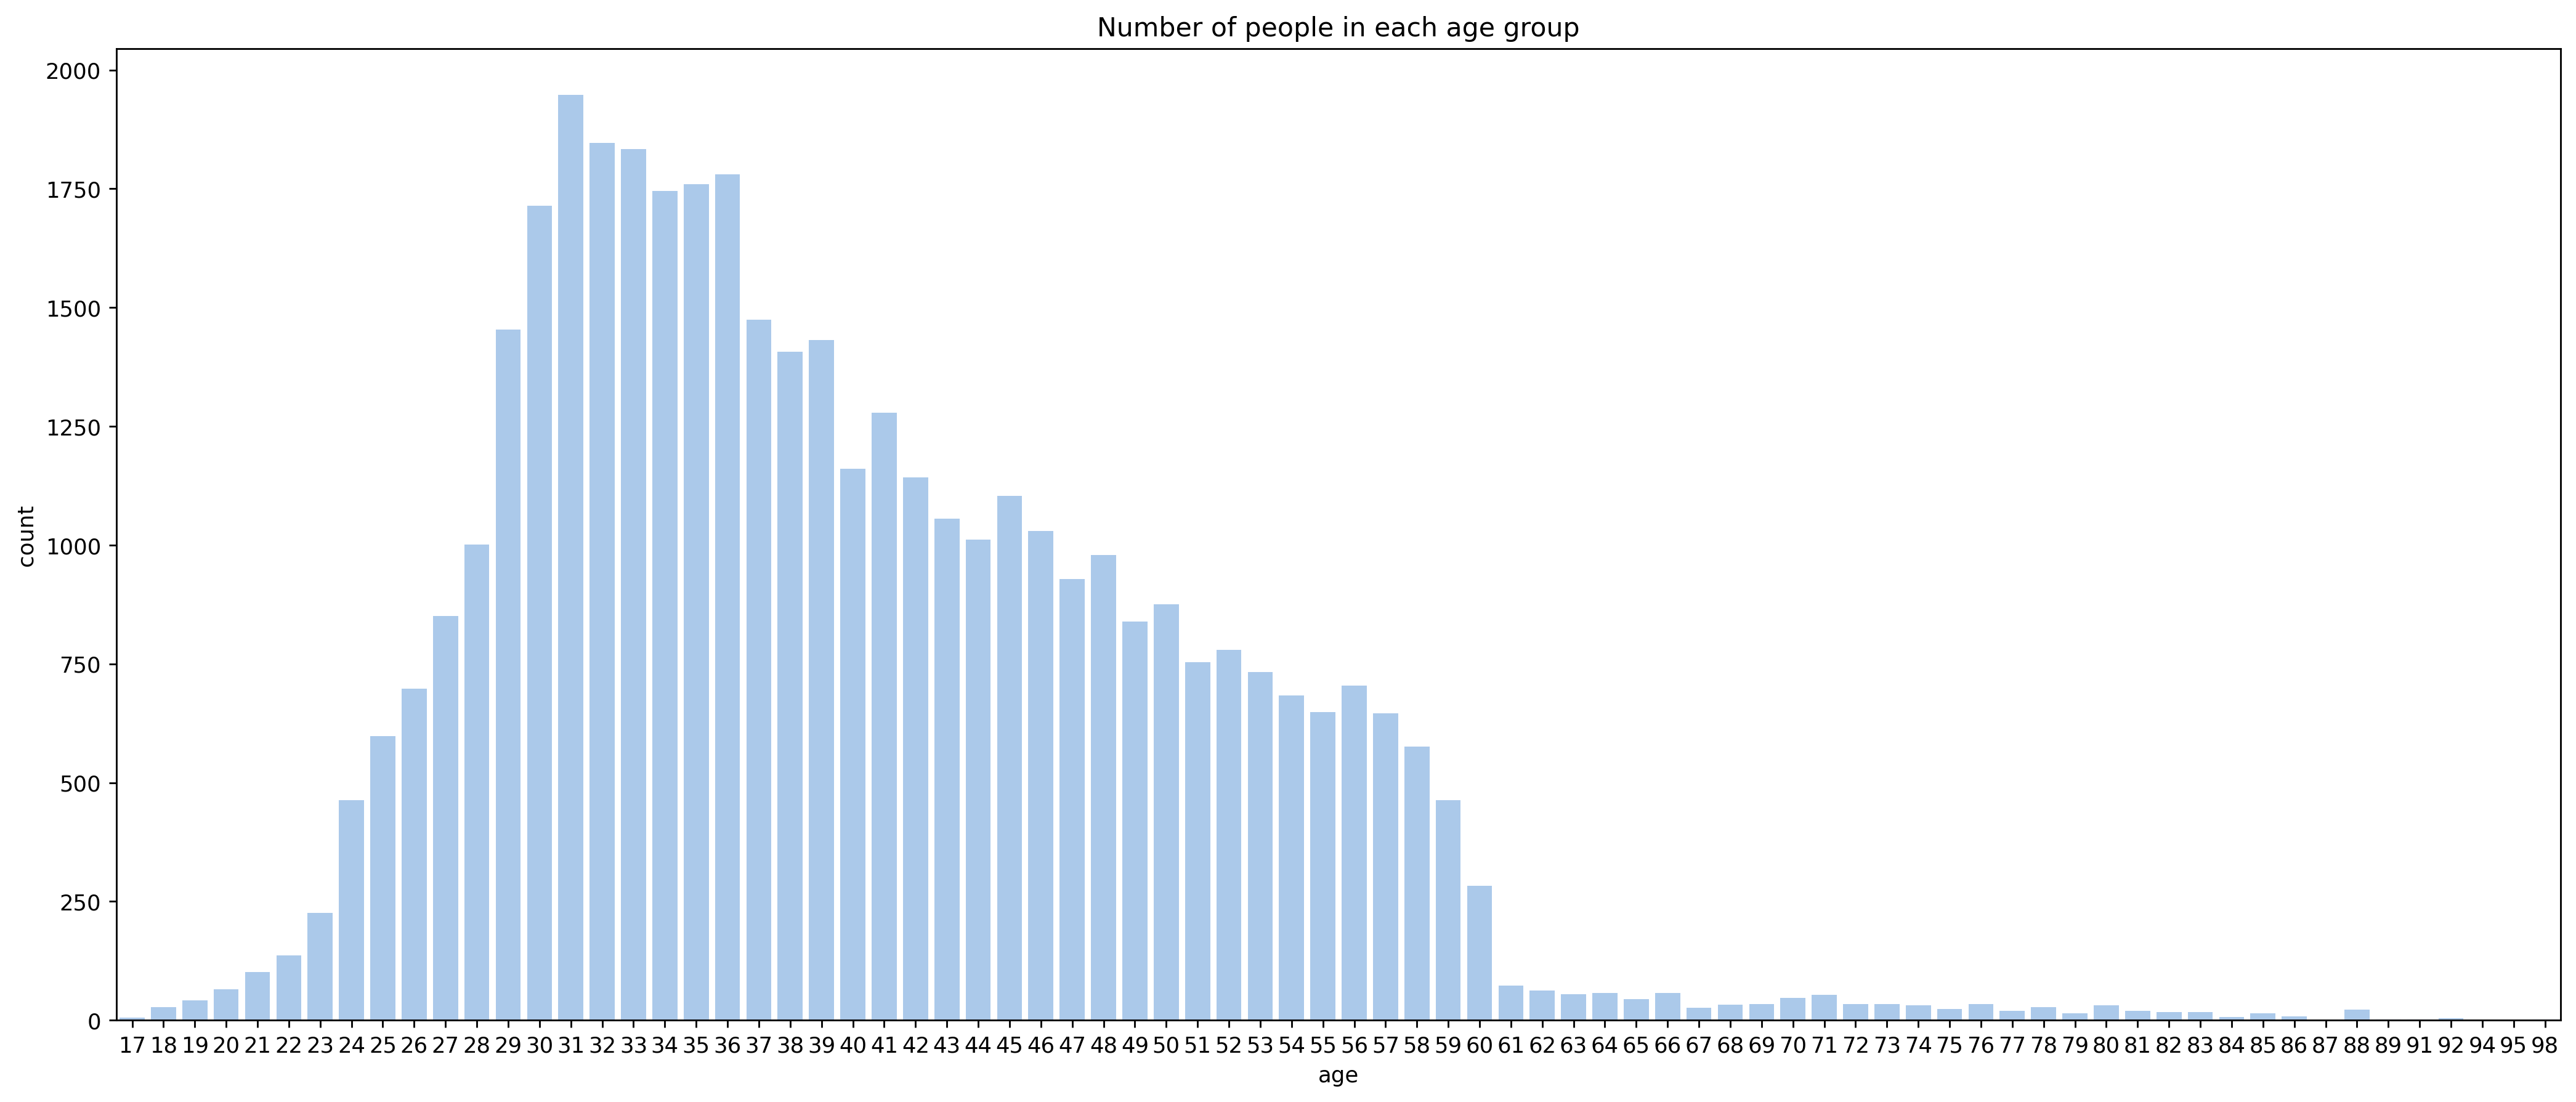

In [9]:
plt.figure(figsize=(20, 8), dpi=256)
sns.countplot(x='age', data=df)
plt.title("Number of people in each age group")

# Visualizing Categorical Variables: Contact, Day of Week, Default, and Education Counts

In [10]:
plt.figure(figsize=(18, 16), dpi=512)
plt.subplot(221)
sns.countplot(x='contact', data=df)
plt.title("contact")

plt.subplot(222)
sns.countplot(x='day_of_week', data=df)
plt.title("day_of_week")

plt.subplot(223)
sns.countplot(x='default', data=df)
plt.title("default")

plt.subplot(224)
sns.countplot(x='education', data=df)
plt.xticks(rotation=70)
plt.title("education")

Text(0.5, 1.0, 'education')

# Insights into Demographic Variables: Housing, Job, Loan, and Marital Status Counts

In [11]:
plt.figure(figsize=(18, 16), dpi=512)
plt.subplot(221)
sns.countplot(x='housing', data=df)
plt.title("housing")

plt.subplot(222)
sns.countplot(x='job', data=df)
plt.xticks(rotation=70)
plt.title("job")

plt.subplot(223)
sns.countplot(x='loan', data=df)
plt.title("loan")

plt.subplot(224)
sns.countplot(x='marital', data=df)
plt.xticks(rotation=70)
plt.title("marital")

Text(0.5, 1.0, 'marital')

# Analyzing Temporal and Outcome Trends: Monthly Distribution and Previous Campaign Outcome Counts

Text(0.5, 1.0, 'poutcome')

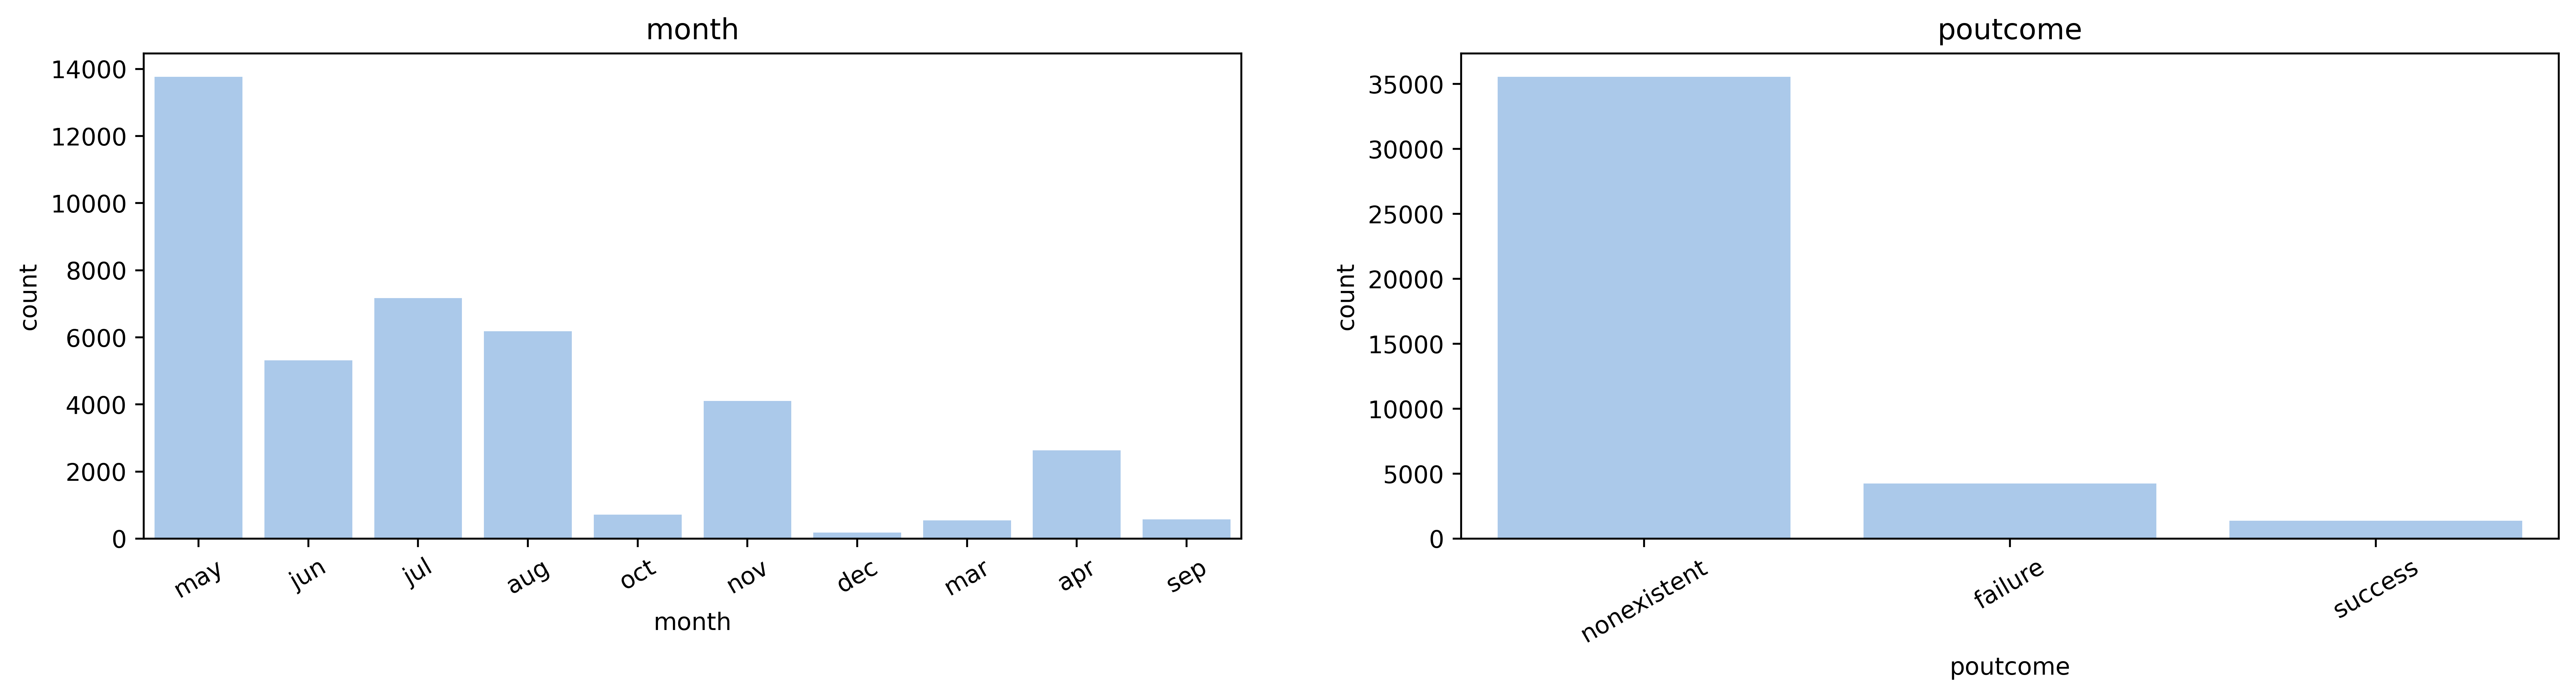

In [12]:
plt.figure(figsize=(18, 8), dpi=512)
plt.subplot(221)
sns.countplot(x='month', data=df)
plt.xticks(rotation=30)
plt.title("month")

plt.subplot(222)
sns.countplot(x='poutcome', data=df)
plt.xticks(rotation=30)
plt.title("poutcome")


# Exploring Relationships: Scatter Matrix of Age, Duration, and Campaign

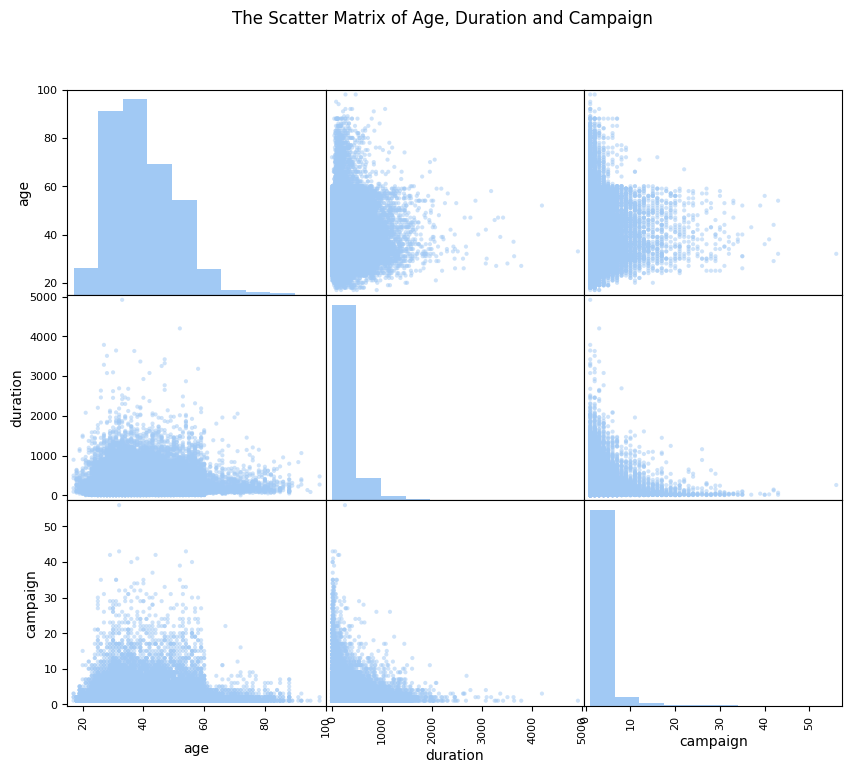

In [13]:
#sns.pairplot(bank_df)
matrix = scatter_matrix(df[['age', 'duration','campaign']],figsize=(10,8))

plt.suptitle('The Scatter Matrix of Age, Duration and Campaign')
plt.show()

# Examining Subscription Rates Across Months: Impact of Subscription on Each Month

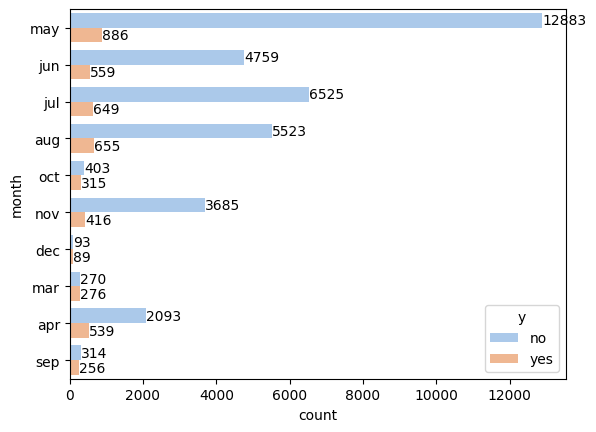

In [14]:
ax = sns.countplot(y='month', hue='y', data=df)
for i in ax.containers:
    ax.bar_label(i,)

# Analyzing Job Categories and Subscription: Subscription Impact Across Different Job Types

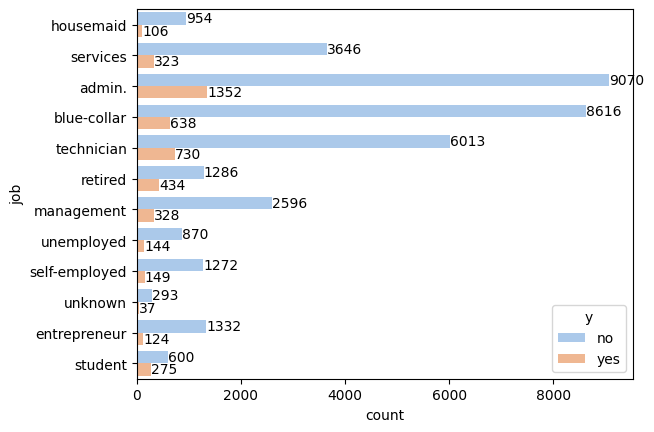

In [15]:
ax = sns.countplot(y='job', hue='y', data=df)
for i in ax.containers:
    ax.bar_label(i,)

# Understanding Age Distribution and Subscription: Displot with Subscription Hue

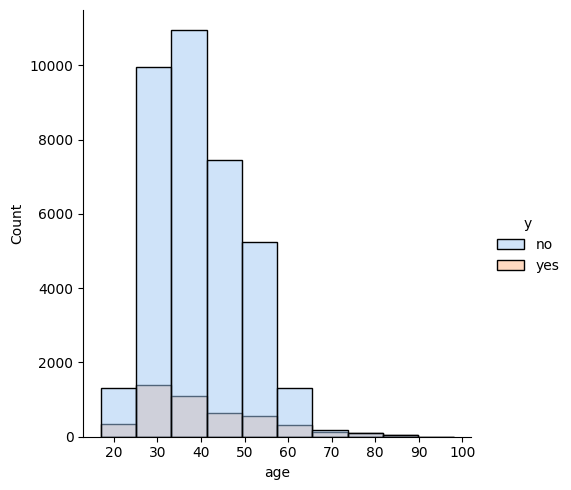

In [16]:
sns.color_palette("flare", as_cmap=True)

ax = sns.displot(df, hue='y', bins=10, x='age')

# Analyzing Age vs. Call Duration: Scatter Plot with Subscription Status

<Axes: xlabel='duration', ylabel='age'>

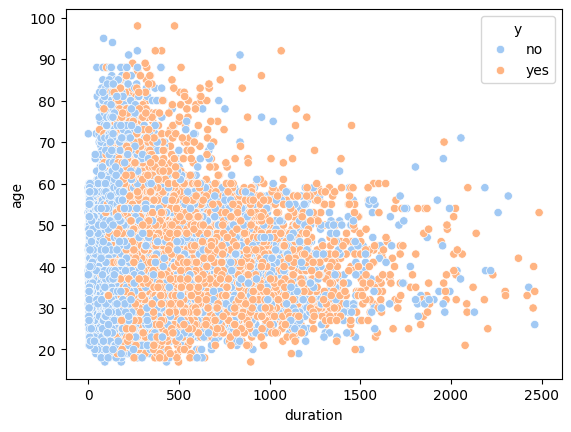

In [17]:
df_ = df[df['duration']<2500] # remove outliears above 2500

sns.scatterplot(data=df_, y='age', x='duration', hue='y')

# Educational Impact on Deposit Subscription: Count of Subscriptions Across Different Education Levels

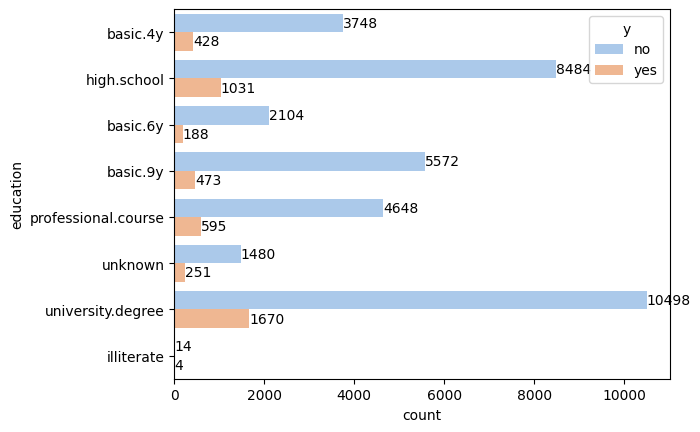

In [18]:
ax = sns.countplot(y='education', hue='y', data=df)
for i in ax.containers:
    ax.bar_label(i,)

# Day-wise Deposit Subscription Analysis: Count of Subscriptions Across Different Days of the Week

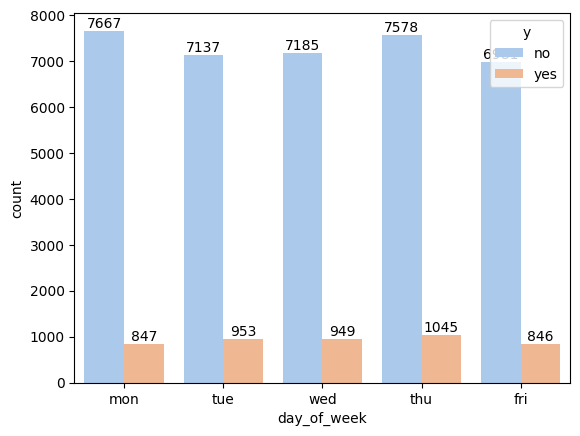

In [19]:
ax = sns.countplot(x='day_of_week', hue='y', data=df)
for i in ax.containers:
    ax.bar_label(i,)

# Exploring Categorical Variables: Visualizing Frequency Counts for Each Categorical Feature

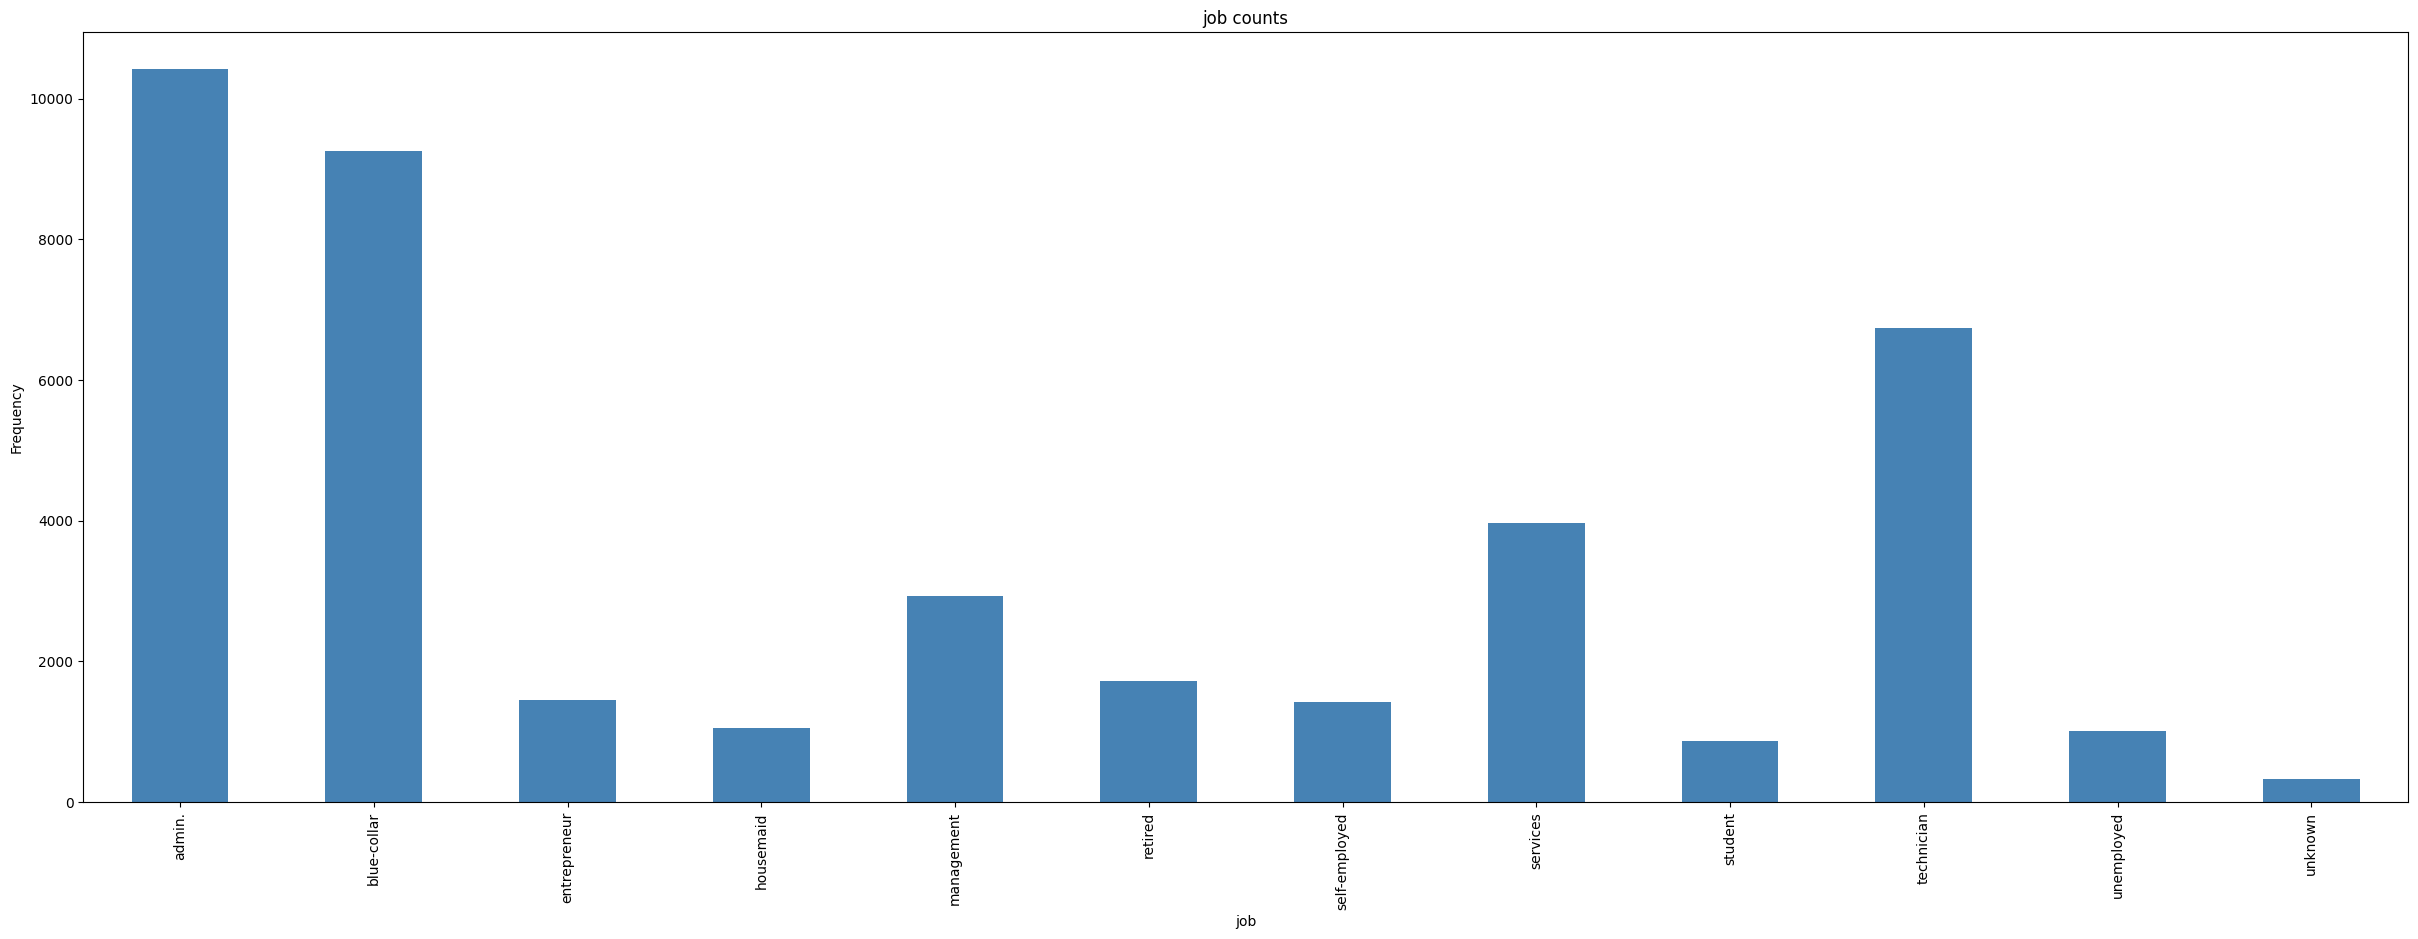

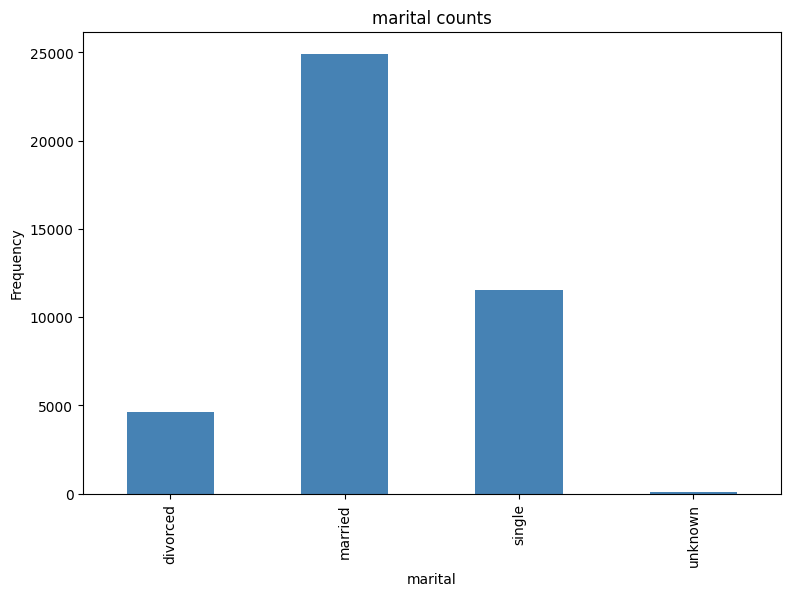

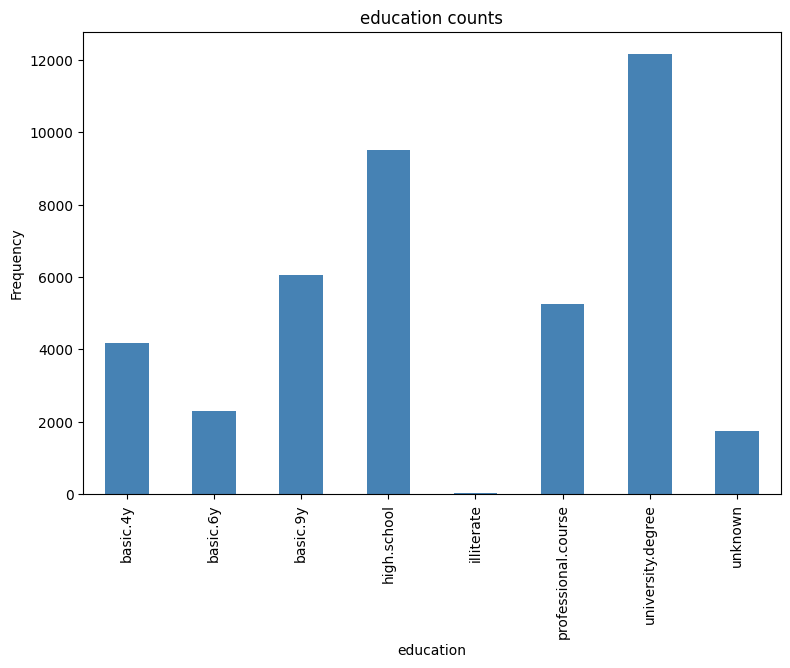

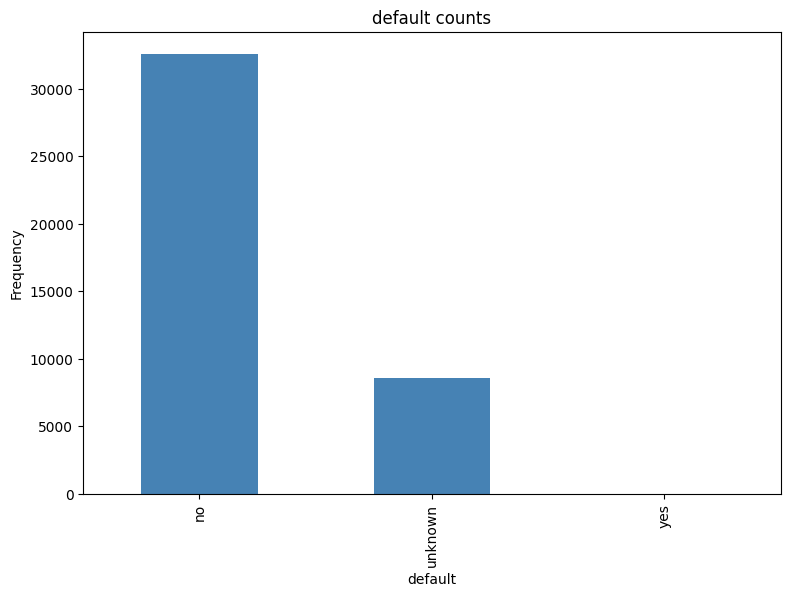

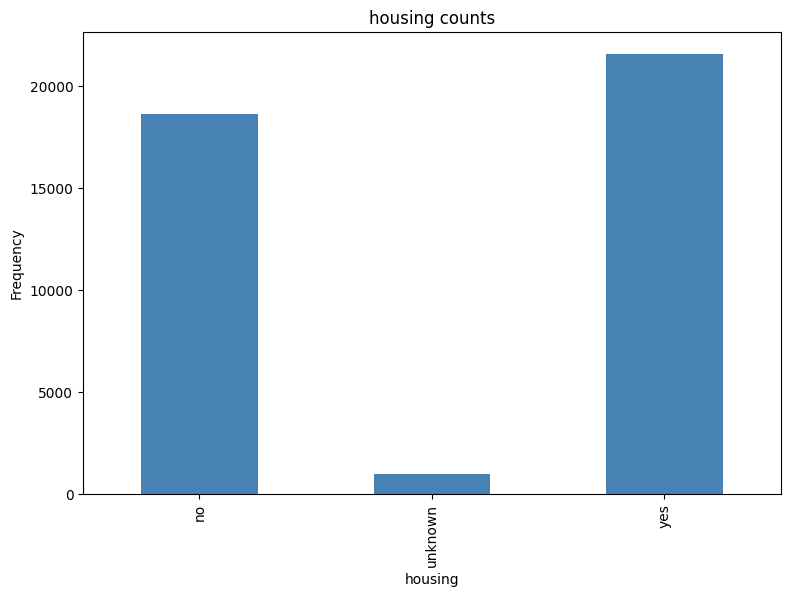

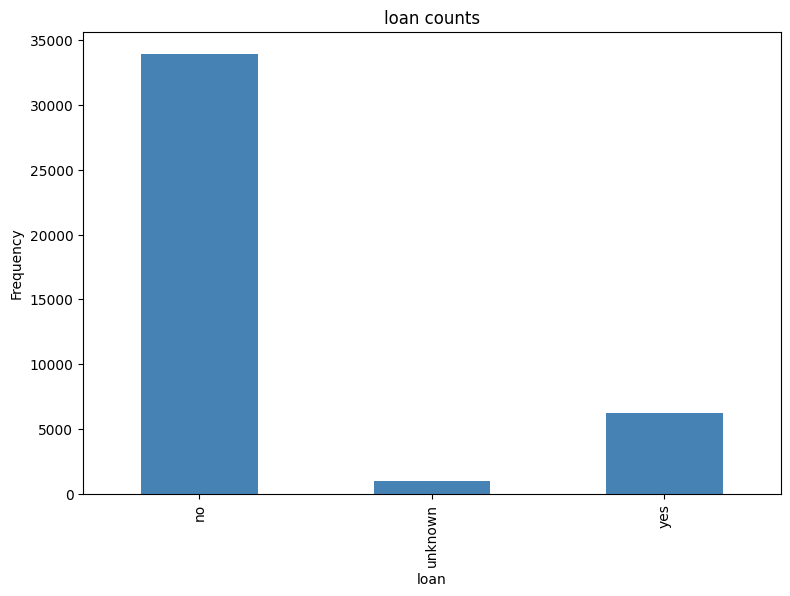

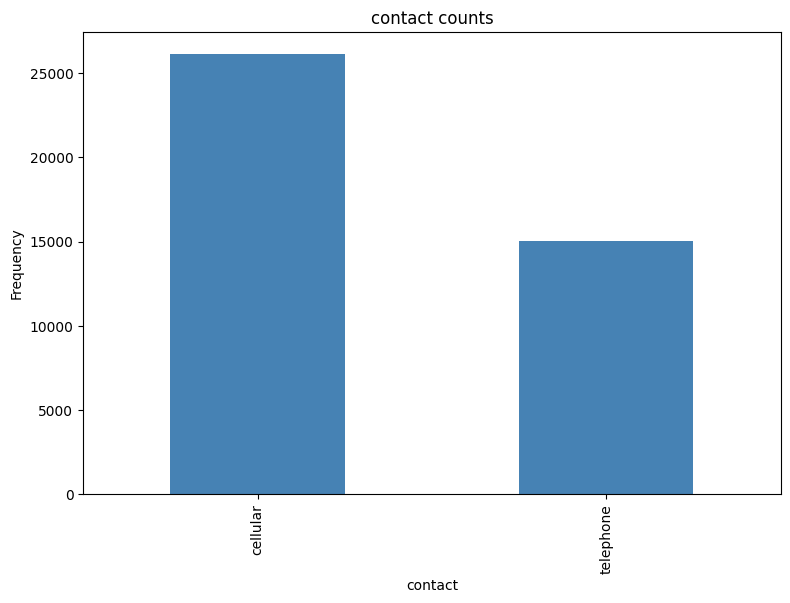

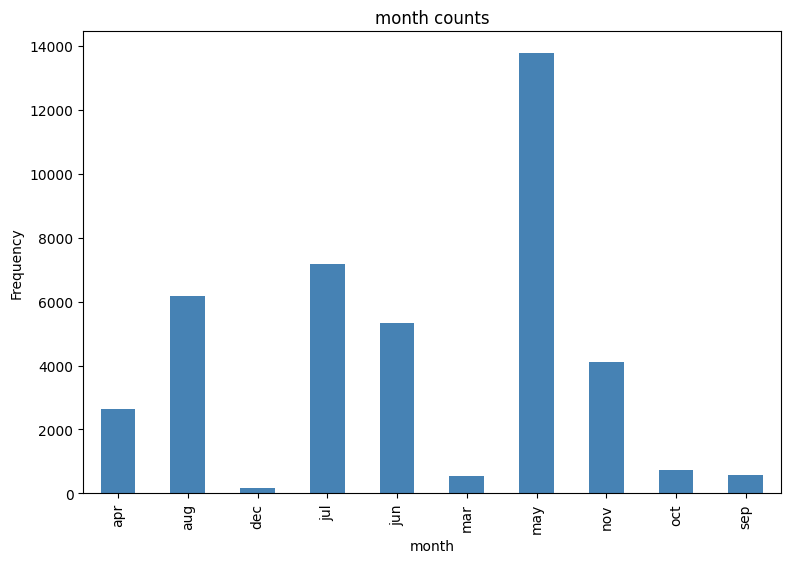

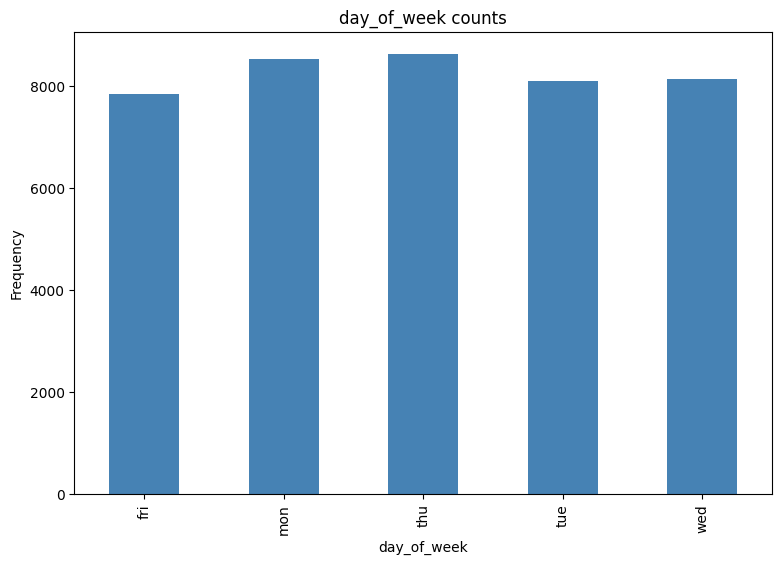

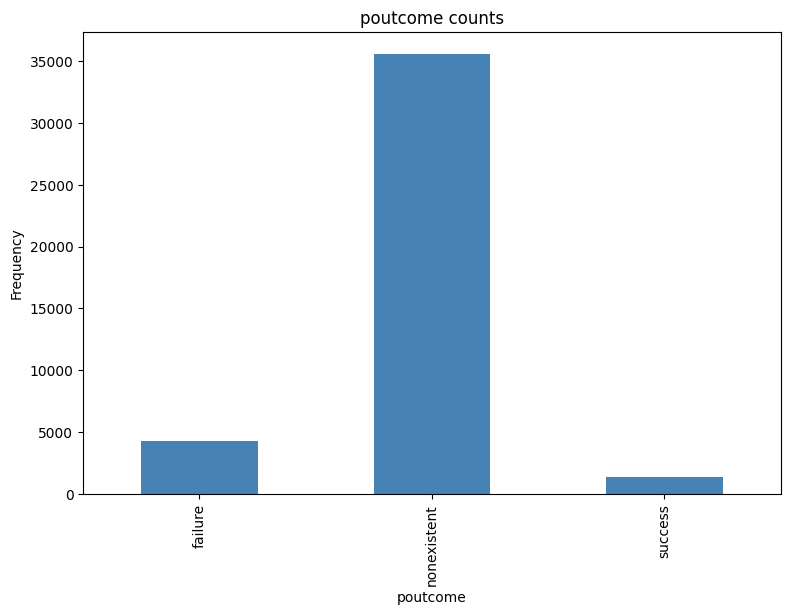

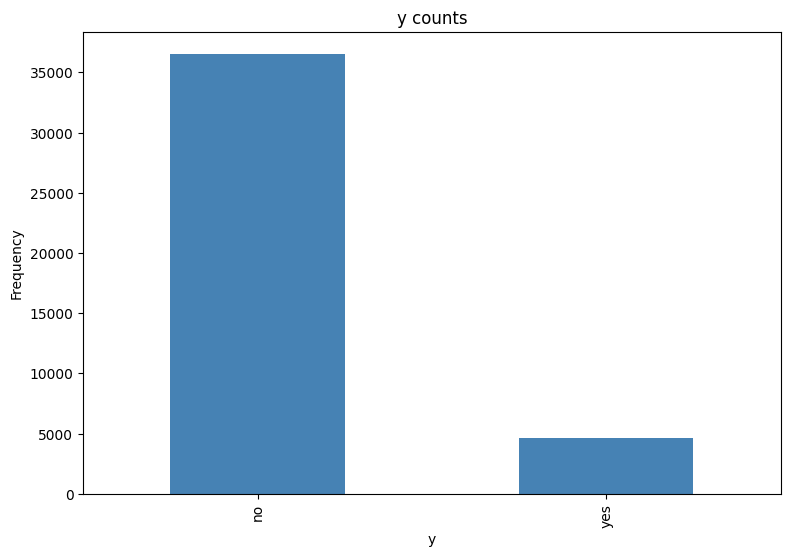

In [20]:
def return_categorical(df):

  categorical_columns = [column_name for column_name in df if df[column_name].dtype == 'O']
  return categorical_columns

for col in return_categorical(df):
    counts = df[col].value_counts().sort_index()
    if len(counts) > 10:
      fig = plt.figure(figsize=(30, 10))
    else:
      fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

def return_numerical(df):

  return list(set(df.columns) - set(return_categorical(df)))


# Exploring Subscription Distribution: Count Plot of Subscription Status

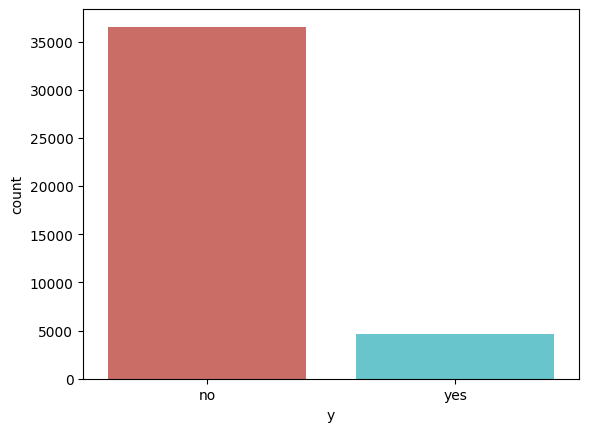

<Figure size 640x480 with 0 Axes>

In [21]:
sns.countplot(x='y', data=df, palette='hls')
plt.show()
plt.savefig('count_plot')

# Job vs. Subscription Frequency: Bar Chart Analysis

Text(0, 0.5, 'Purchase Frequency')

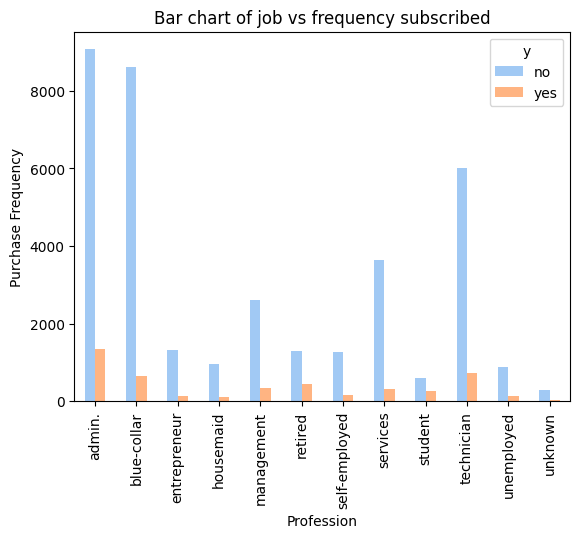

In [22]:
pd.crosstab(df.job, df.y).plot(kind='bar')
plt.title("Bar chart of job vs frequency subscribed")
plt.xlabel("Profession")
plt.ylabel("Purchase Frequency")

# Marital Status vs. Subscription Frequency: Stacked Bar Chart Analysis

Text(0, 0.5, 'Purchase Frequency')

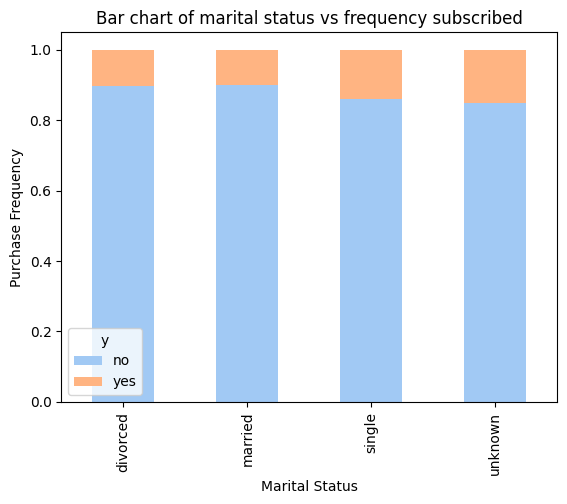

In [23]:
table = pd.crosstab(df.marital, df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title("Bar chart of marital status vs frequency subscribed")
plt.xlabel("Marital Status")
plt.ylabel("Purchase Frequency")

# Educational Impact on Subscription Frequency: Stacked Bar Chart Analysis

Text(0, 0.5, 'Purchase Frequency')

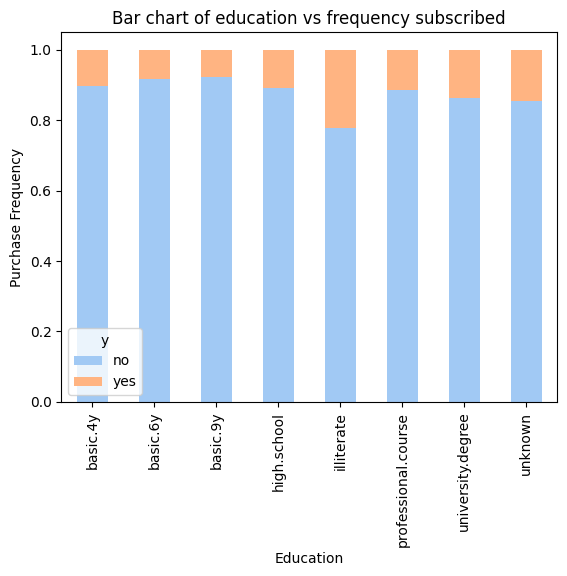

In [24]:
table = pd.crosstab(df.education, df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title("Bar chart of education vs frequency subscribed")
plt.xlabel("Education")
plt.ylabel("Purchase Frequency")

# Day of Week vs. Subscription Frequency: Stacked Bar Chart Analysis

Text(0, 0.5, 'Purchase Frequency')

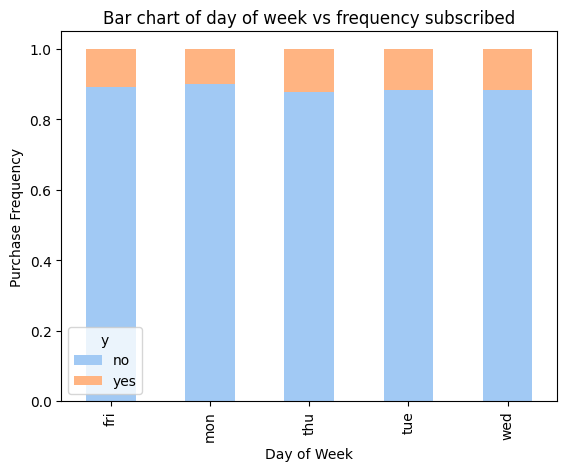

In [25]:
table = pd.crosstab(df.day_of_week, df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title("Bar chart of day of week vs frequency subscribed")
plt.xlabel("Day of Week")
plt.ylabel("Purchase Frequency")

# Monthly Subscription Frequency: Stacked Bar Chart Analysis

Text(0, 0.5, 'Purchase Frequency')

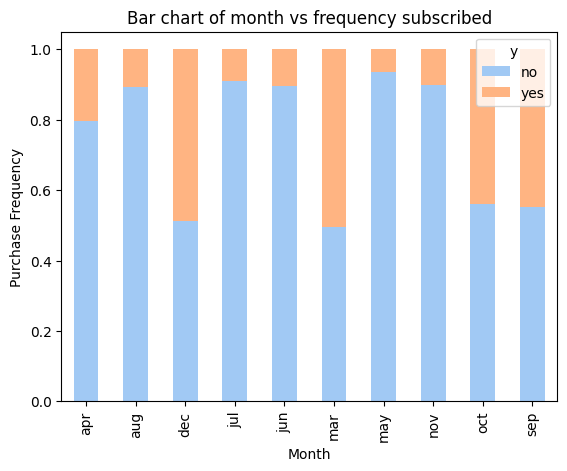

In [26]:
table = pd.crosstab(df.month, df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title("Bar chart of month vs frequency subscribed")
plt.xlabel("Month")
plt.ylabel("Purchase Frequency")

# Previous Campaign Outcome vs. Subscription Frequency: Stacked Bar Chart Analysis

Text(0, 0.5, 'Purchase Frequency')

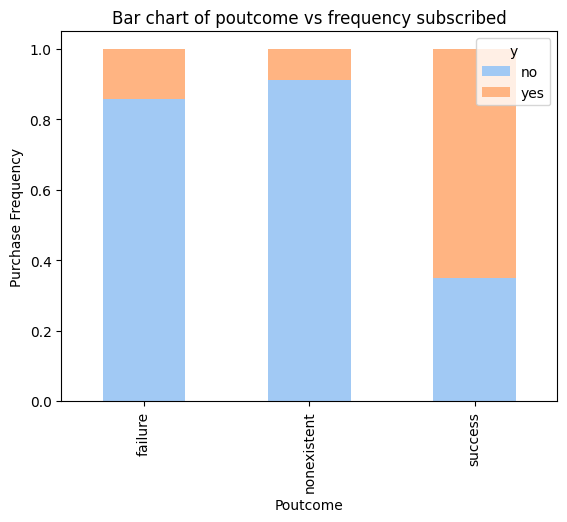

In [27]:
table = pd.crosstab(df.poutcome, df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title("Bar chart of poutcome vs frequency subscribed")
plt.xlabel("Poutcome")
plt.ylabel("Purchase Frequency")

# Age Distribution vs. Subscription Frequency: Histogram Analysis

Text(0, 0.5, 'Frequency')

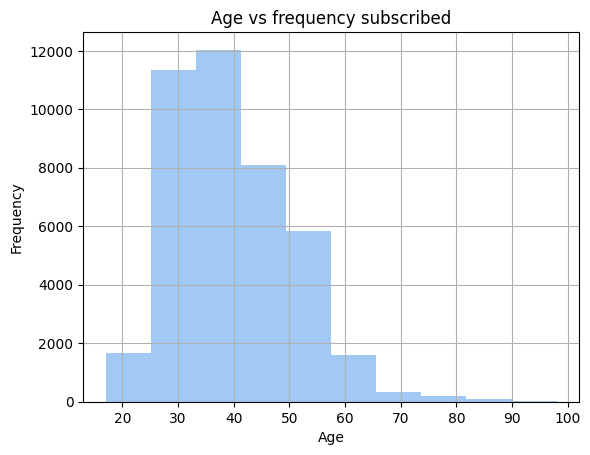

In [28]:
df.age.hist()
plt.title('Age vs frequency subscribed')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Exploring Numeric Variable Distributions: Boxplots for Each Numeric Feature

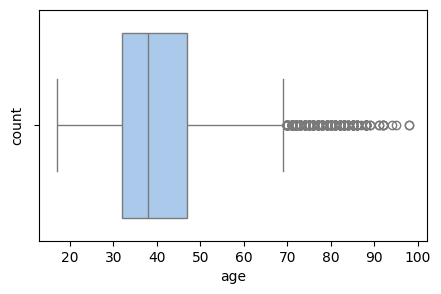

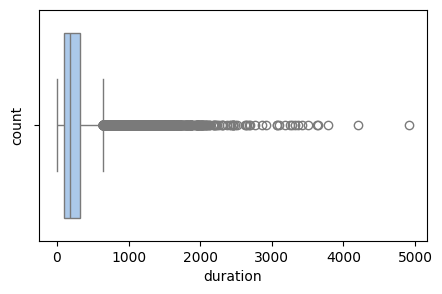

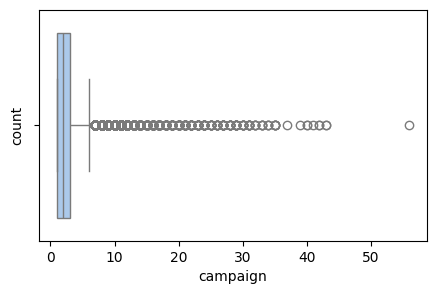

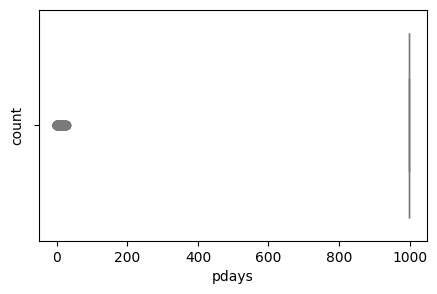

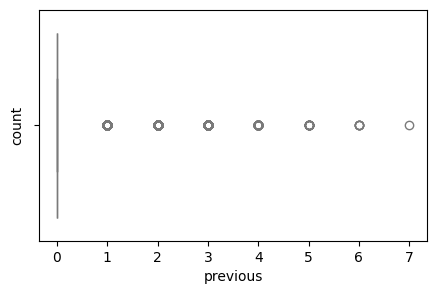

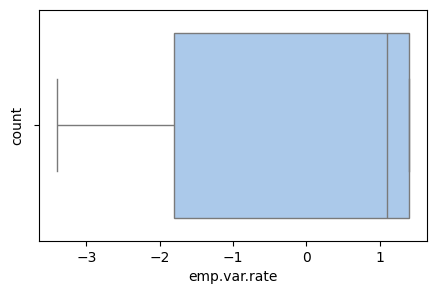

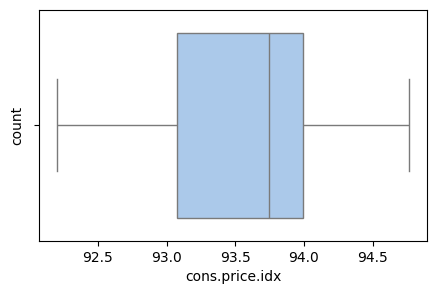

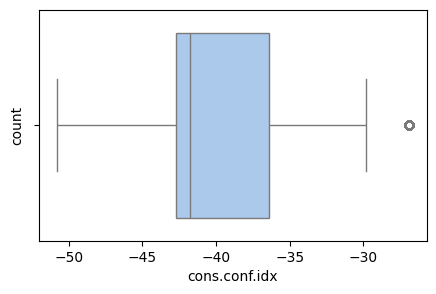

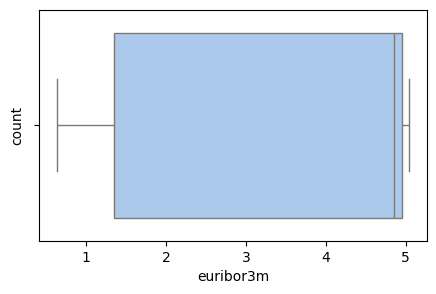

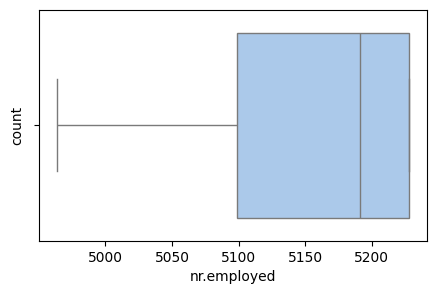

In [29]:
col_list = list(df.columns)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
for col in col_list:
    if ((df[col].dtype=='int64')or(df[col].dtype=='float64')):
        plt.figure(figsize=(5,3))
        sns.boxplot(df[col],orient='h')
        plt.xlabel(col)
        plt.ylabel('count')
        plt.show()